### Convergence Testing
##### See lab notebook p. 28 for explanation

__NOTES__
1. With `b_top = .5` (B annealing with + field), M will likely be positive at lower temps, and so $M = |M|$. This is used for the expected, analytic value of M

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# note: first clear data directory, and make sure series and snapshots directories exist

In [20]:
# parameters
n_steps = 20000
n_burnin = 4000
n_analyze = 10000
N = 100
b_top = 0.5

t_min = 1.3
t_step = 0.5
t_max = 3.3

multiprocess = False # multiprocess does not seem to be working. Also it doesn't help much with runs of few T values.

# run simulation:
# NOTE: this puts data in temporary directories (here, 'snapshots', 'data', and 'series'). Should be moved IMMEDIATELY

!python ising.py n_steps:$n_steps n_burnin:$n_burnin n_analyze:$n_analyze N:$N b_top:$b_top t_min:$t_min t_max:$t_max \
                 t_step:$t_step multiprocess:$multiprocess

inp["n_steps"]       set to int     20000
inp["n_burnin"]      set to int     4000
inp["n_analyze"]     set to int     10000
inp["N"]             set to int     100
inp["b_top"]         set to float   0.5
inp["t_min"]         set to float   1.6
inp["t_max"]         set to float   2.6
inp["t_step"]        set to float   0.1

2D Ising Model Simulation; single core

100x100 (T=1.60) steps:   20000/  20000, 100.0%  run time: 00:00:02  est.time-to-go:    done!
100x100 (T=1.70) steps:   20000/  20000, 100.0%  run time: 00:00:02  est.time-to-go:    done!
100x100 (T=1.80) steps:   20000/  20000, 100.0%  run time: 00:00:02  est.time-to-go:    done!
100x100 (T=1.90) steps:   20000/  20000, 100.0%  run time: 00:00:02  est.time-to-go:    done!
100x100 (T=2.00) steps:   20000/  20000, 100.0%  run time: 00:00:02  est.time-to-go:    done!
100x100 (T=2.10) steps:   20000/  20000, 100.0%  run time: 00:00:02  est.time-to-go:    done!
100x100 (T=2.20) steps:   20000/  20000, 100.0%  run time: 00:00:03  e

In [21]:
Experiment_name = "Notebook_test"

In [22]:
# move data automatically
!mkdir datatests/$Experiment_name 
!mv data datatests/$Experiment_name
!mv snapshots datatests/$Experiment_name
!mv series datatests/$Experiment_name
!mkdir data
!mkdir snapshots
!mkdir series

In [23]:
E = np.load(f"datatests/{Experiment_name}/series/E_series.npy")
M = np.load(f"datatests/{Experiment_name}/series/M_series.npy")

In [24]:
temps = E[:, 0] # make temp array

In [44]:
# make moving average:
window_size = 1000
E_avg = np.zeros((E.shape[0], E.shape[1] - window_size - 1)) #-1 bc average doesn't have a temp column
M_avg = np.zeros((E.shape[0], E.shape[1] - window_size - 1))

for i in range(E_avg.shape[0]):
    for j in range(E_avg.shape[1]):
        E_avg[i][j] = np.average(E[i][(1+j):(window_size+j+1)])
        M_avg[i][j] = np.average(M[i][(1+j):(window_size+j+1)])
        
# centers of ranges
xp = np.arange(window_size/2, E.shape[1] - window_size/2 - 1)

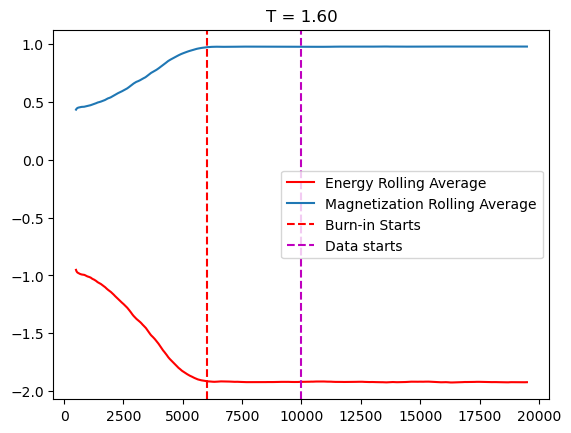

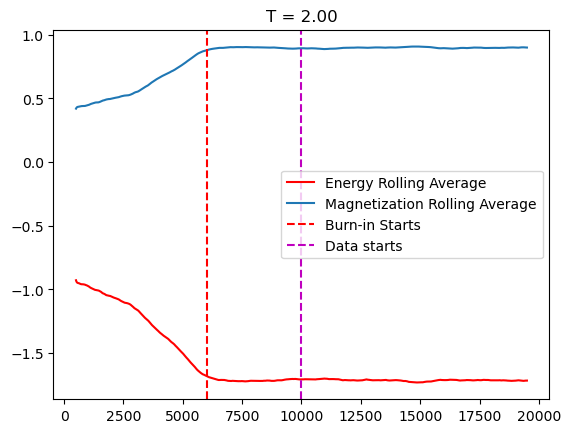

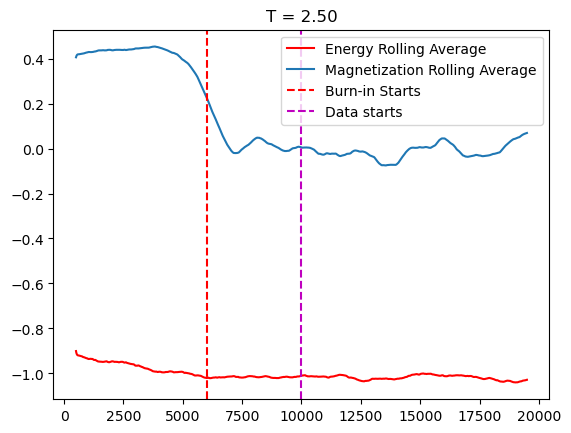

In [47]:
n_graphs = 3
n_slope = n_steps - n_burnin - n_analyze
for i in np.linspace(0, len(temps) - 1, n_graphs):
    i = int(i)
    plt.plot(xp, E_avg[i], c='red', label='Energy Rolling Average')
    plt.plot(xp, M_avg[i], label='Magnetization Rolling Average')
    plt.title(f"T = {temps[i]:.2f}")
    plt.axvline(x=n_slope, c='r', ls='--', label='Burn-in Starts')
    plt.axvline(x=n_slope + n_burnin, c='m', ls='--', label="Data starts")
    plt.legend()
    plt.show()